In [1]:
!pip install transformers torch torchvision accelerate

In [2]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

In [3]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration

# Detect device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load BLIP-2 with Flan-T5 (light version)
processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-flan-t5-xl",
    torch_dtype=torch.float32,
)
model.to(device)


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Using device: cpu


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:  32%|###2      | 4.76G/14.7G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:  43%|####3     | 4.46G/10.3G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
  )
  (qf

In [4]:
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert('RGB')
    inputs = processor(raw_image, return_tensors="pt").to("cpu", torch.float32)
    
    output = model.generate(**inputs, max_new_tokens=30)
    caption = processor.decode(output[0], skip_special_tokens=True)
    return caption


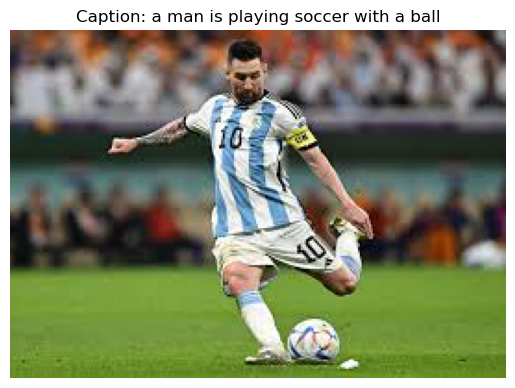

In [22]:
from PIL import Image
import requests
import matplotlib.pyplot as plt

# 1. Load an image (either from URL or local path)
#image_path = "cats_dogs_dataset/images/train/dogs/dog.10.jpg"  # ← Change to your image path
image_path = "../pictures/camera roll/messi.jpg"
image = Image.open(image_path).convert("RGB")

# 2. Preprocess the image for BLIP-2
inputs = processor(images=image, return_tensors="pt").to(device, torch.float32)

# 3. Generate the caption
generated_ids = model.generate(**inputs, max_new_tokens=50)
caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# 4. Display the image and caption
plt.imshow(image)
plt.axis("off")
plt.title(f"Caption: {caption}", fontsize=12)
plt.show()
